الف)
حذف نویز متناوب با FFT

In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

ابتدا عکس اصلی را با استفاده از دستور imread دریافت میکنیم و سپس با استفاده از دستور imshow آن را نمایش میدهیم.

Text(0.5, 1.0, 'Original Image')

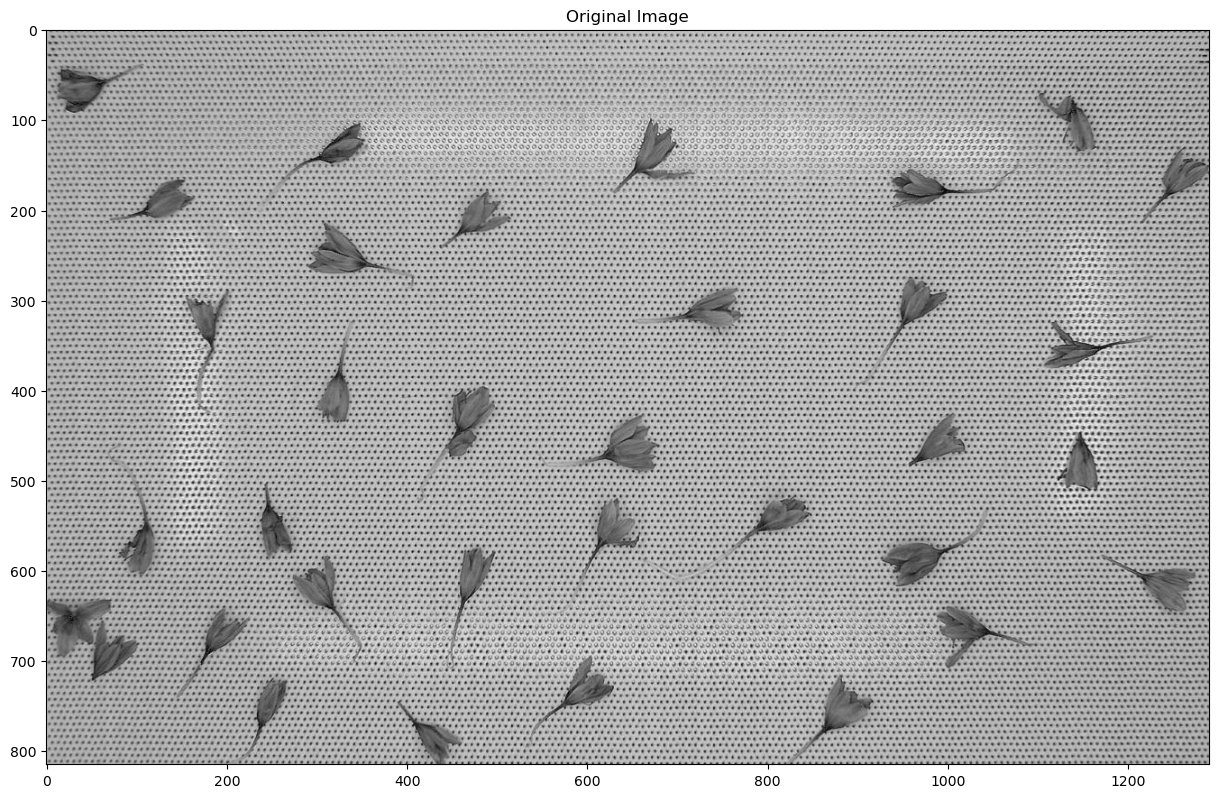

In [2]:
# Read the image
original_img = cv2.imread('images/saffrun.jpg', cv2.IMREAD_GRAYSCALE)

# show original image
plt.figure(figsize=(15,15))
plt.imshow(original_img, cmap='gray')
plt.title('Original Image')

حال با استفاده از تبدیل فوریه دو بعدی تصویر را از فضای
زمان به فرکانس منتقل میکنیم.

Text(0.5, 1.0, '2D FFT Before Normalization')

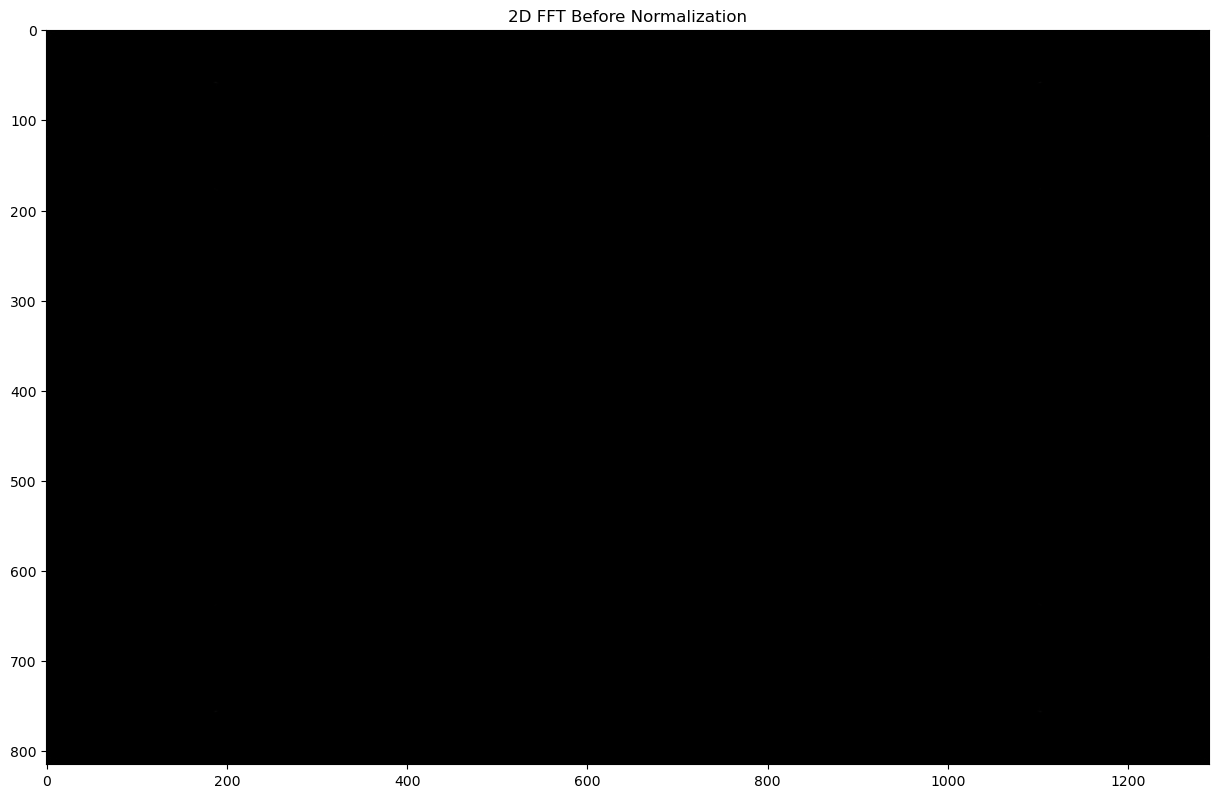

In [3]:
# Perform 2D FFT
f = np.fft.fft2(original_img) # https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html
plt.figure(figsize=(15,15))
plt.imshow(np.abs(f), cmap='gray')
plt.title('2D FFT Before Normalization')


همان طور که میبینیم تصویر قابل فهمی دیده نمی شود چرا که مقادیر خیلی نزدیک به هم 
هستند و نیاز به نرمال شدن دارند.

Text(0.5, 1.0, '2D FFT After Normalization (Magnitude Spectrum)')

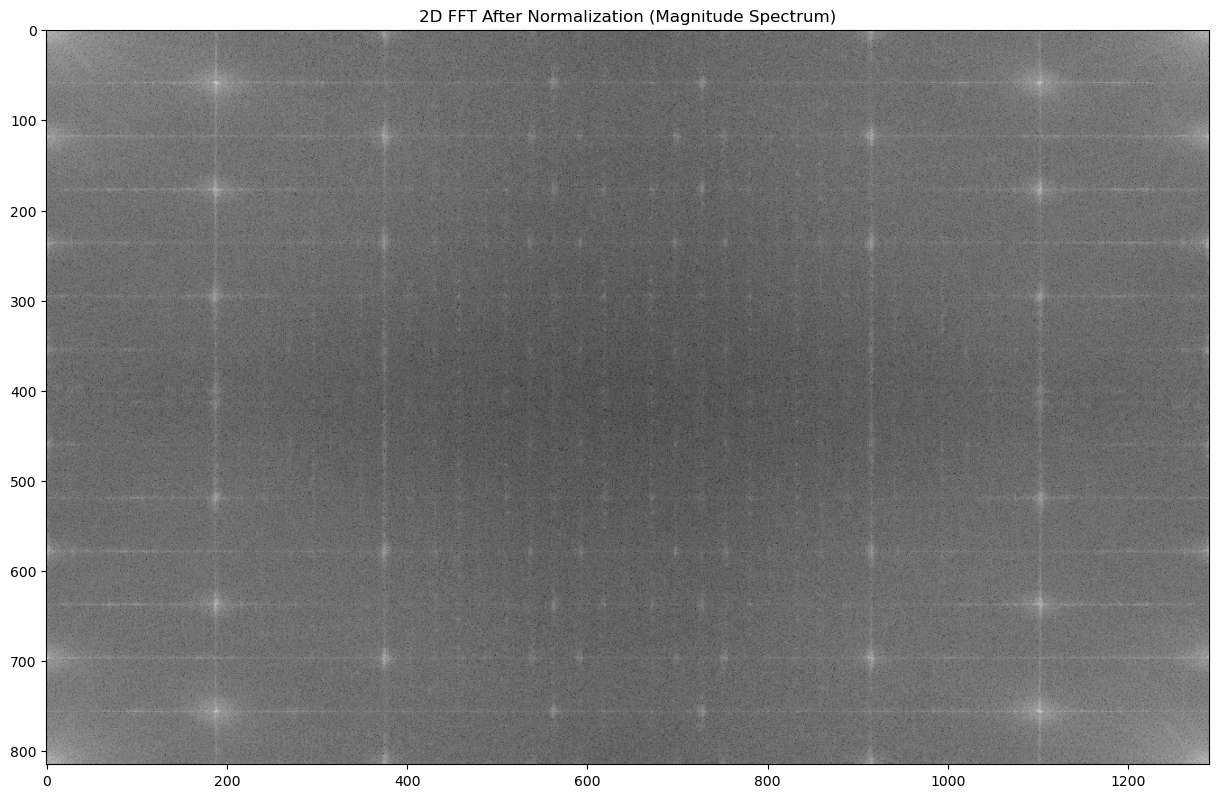

In [4]:
# show magnitude spectrum
magnitude_spectrum = 20*np.log(np.abs(f))
plt.figure(figsize=(15,15))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('2D FFT After Normalization (Magnitude Spectrum)')

حال تصویر را شیفت می دهیم تا فرکانس های پایین به وسط تصویر منتقل شوند.

Text(0.5, 1.0, 'Shifted 2D FFT Before Normalization')

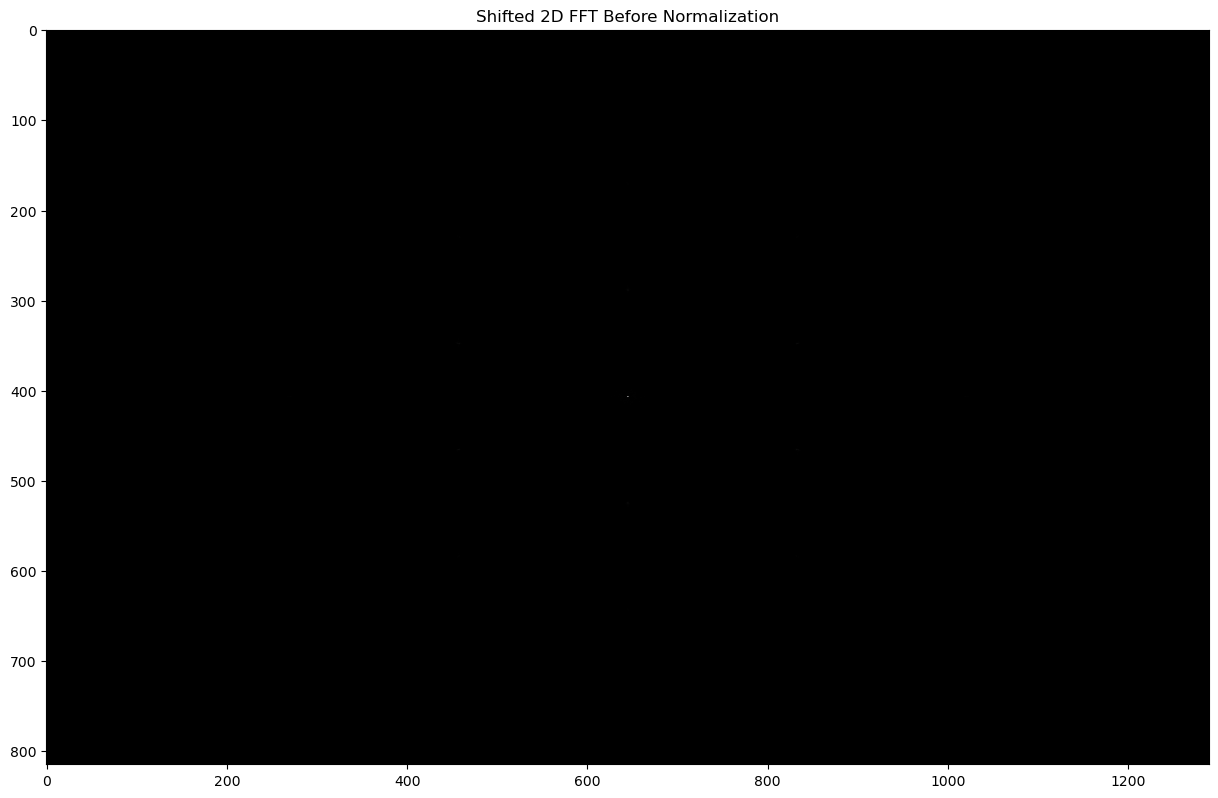

In [5]:

fshift = np.fft.fftshift(f) # https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html
plt.figure(figsize=(15,15))
plt.imshow(np.abs(fshift), cmap='gray')
plt.title('Shifted 2D FFT Before Normalization')


نرمال سازی میکنیم تا مقادیر قابل دیدن باشند.
و کنتراست تصویر را افزایش میدهیم.

Text(0.5, 1.0, 'Magnitude Spectrum of Shifted 2D FFT After Normalization')

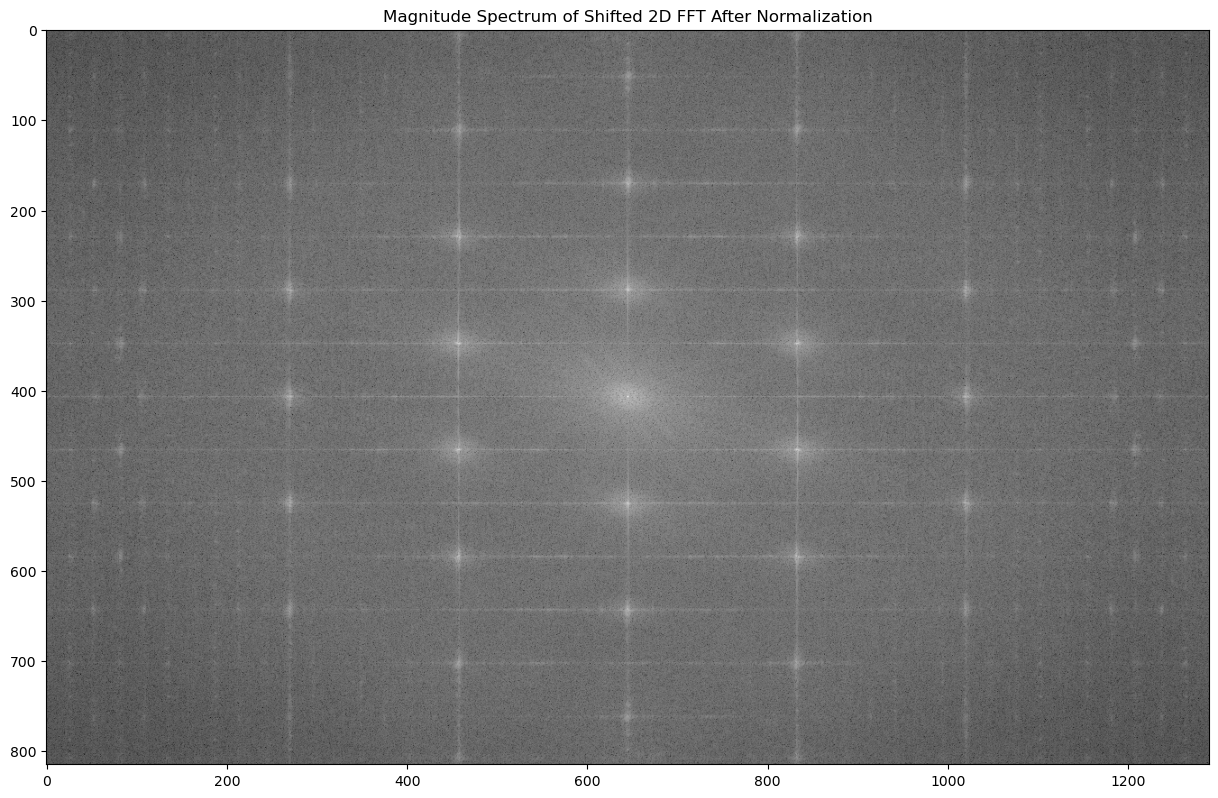

In [6]:
# show magnitude spectrum
shifted_magnitude_spectrum = 20*np.log(np.abs(fshift)) # shifted_magnitude_spectrum (normalized)
plt.figure(figsize=(15,15))
plt.imshow(shifted_magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum of Shifted 2D FFT After Normalization')

از وارون تبدیل فوریه استفاده میکنیم تا به تصویر اصلی برسیم.

Text(0.5, 1.0, 'Reconstructed Image')

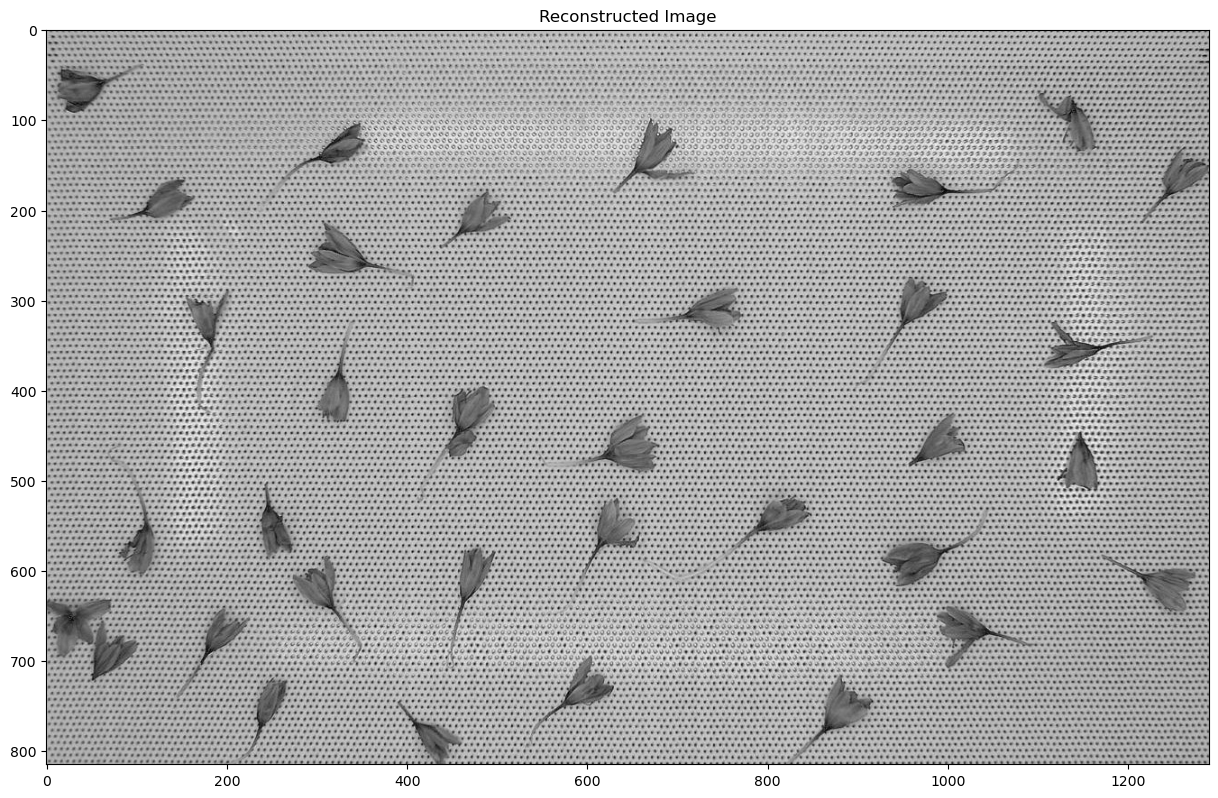

In [7]:
# get the image from fshift
img_back = np.fft.ifft2(fshift) # https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html
img_back = np.abs(img_back)
plt.figure(figsize=(15,15))
plt.imshow(img_back, cmap='gray')
plt.title('Reconstructed Image')


<div dir="rtl">
    فیلتر با متود اول
<div>

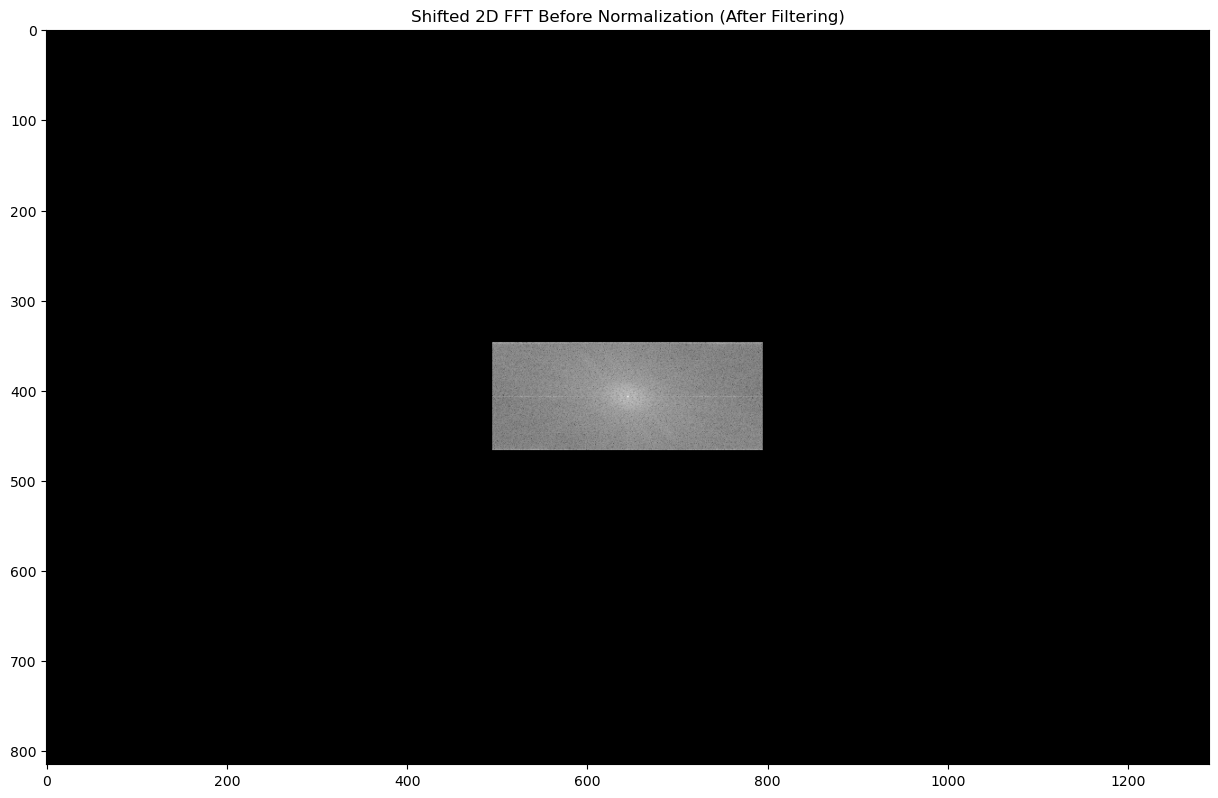

In [26]:
# filter in frequency domain
rows, cols = original_img.shape
crow, ccol = rows//2, cols//2
filterd_magnitude_spectrum = np.zeros((rows, cols))
filterd_fshift = np.zeros((rows, cols), dtype=complex)

# shifted_magnitude_spectrum[crow-30:crow+30, ccol-30:ccol+30] = 0
filterd_magnitude_spectrum[crow-60:crow+60, ccol-150:ccol+150] = shifted_magnitude_spectrum[crow-60:crow+60, ccol-150:ccol+150]
filterd_fshift[crow-60:crow+60, ccol-150:ccol+150] = fshift[crow-60:crow+60, ccol-150:ccol+150]
# filterd_fshift[crow-60:crow+60, ccol-150:ccol+150] = np.real(fshift[crow-60:crow+60, ccol-150:ccol+150]) # wrong :)
plt.figure(figsize=(15,15))
plt.imshow(np.abs(filterd_magnitude_spectrum), cmap='gray')
plt.title('Shifted 2D FFT Before Normalization (After Filtering)')
plt.show()


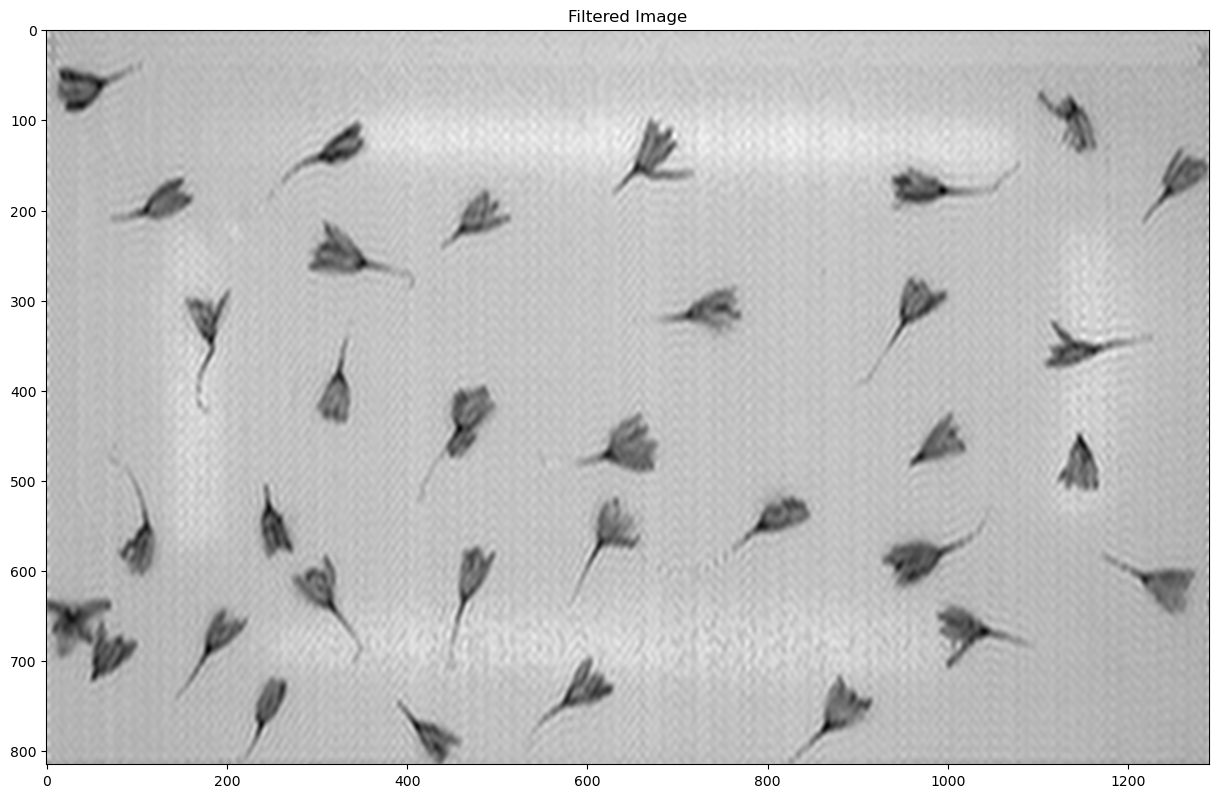

In [27]:
# https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html
# https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html
filtered_img = np.fft.ifft2(np.fft.ifftshift(filterd_fshift))
# normalize
# filtered_img = np.real(filtered_img)
# filtered_img = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

plt.figure(figsize=(15,15))
plt.imshow(np.abs(filtered_img), cmap='gray')
plt.title('Filtered Image')
plt.show()


<div dir="rtl">
    فیلتر با متود دوم
منبع:
https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html
<div>

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_14916/1661217312.py:23: RuntimeWarning: divide by zero encountered in log
  plt.imshow(20*np.log(np.abs(im_fft2)), cmap='gray')


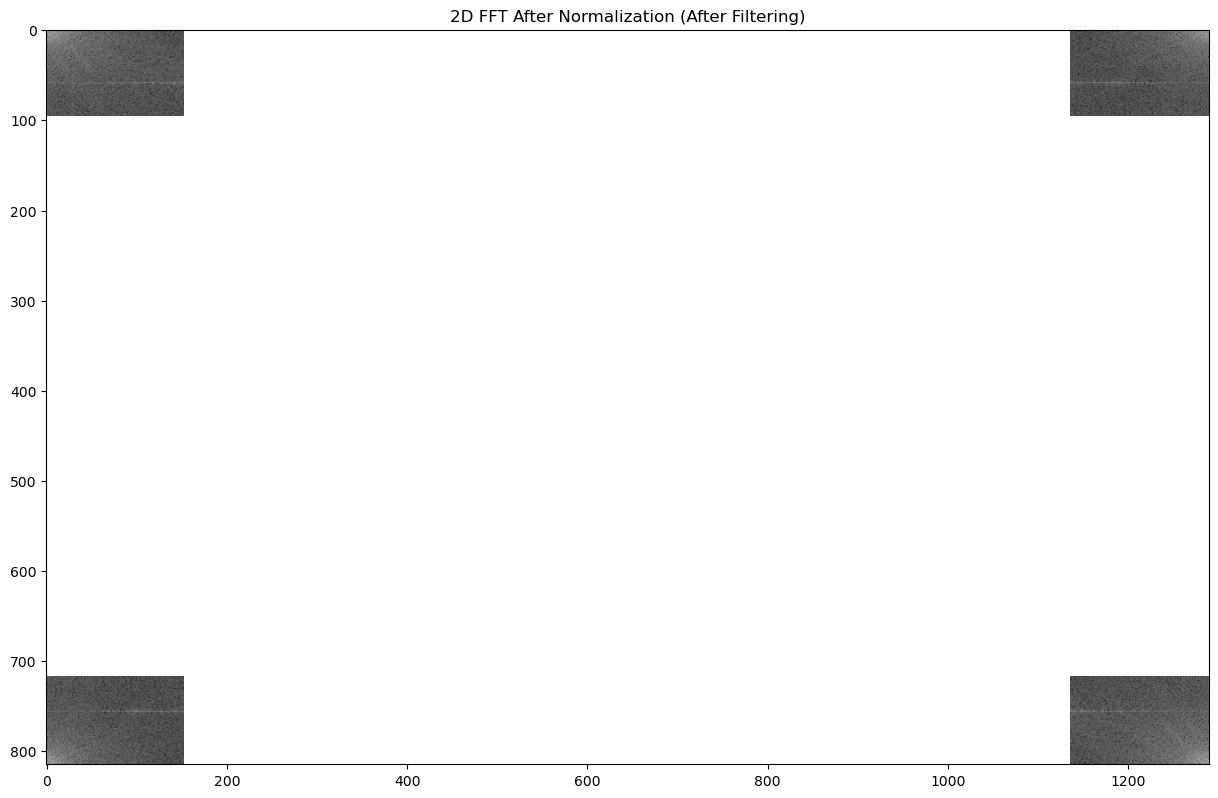

In [28]:
# In the lines following, we'll make a copy of the original spectrum and
# truncate coefficients.

# Define the fraction of coefficients (in each direction) we keep
keep_fraction = 0.12

# Call ff a copy of the original transform. Numpy arrays have a copy
# method for this purpose.
im_fft2 = f.copy()
# im_fft2 = fshift.copy()

# Set r and c to be the number of rows and columns of the array.
r, c = im_fft2.shape

# Set to zero all rows with indices between r*keep_fraction and
# r*(1-keep_fraction):
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0

# Similarly with the columns:
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure(figsize=(15,15))
plt.imshow(20*np.log(np.abs(im_fft2)), cmap='gray') 
# plt.imshow(np.abs(im_fft2), cmap='gray') 
plt.title('2D FFT After Normalization (After Filtering)')
plt.show()

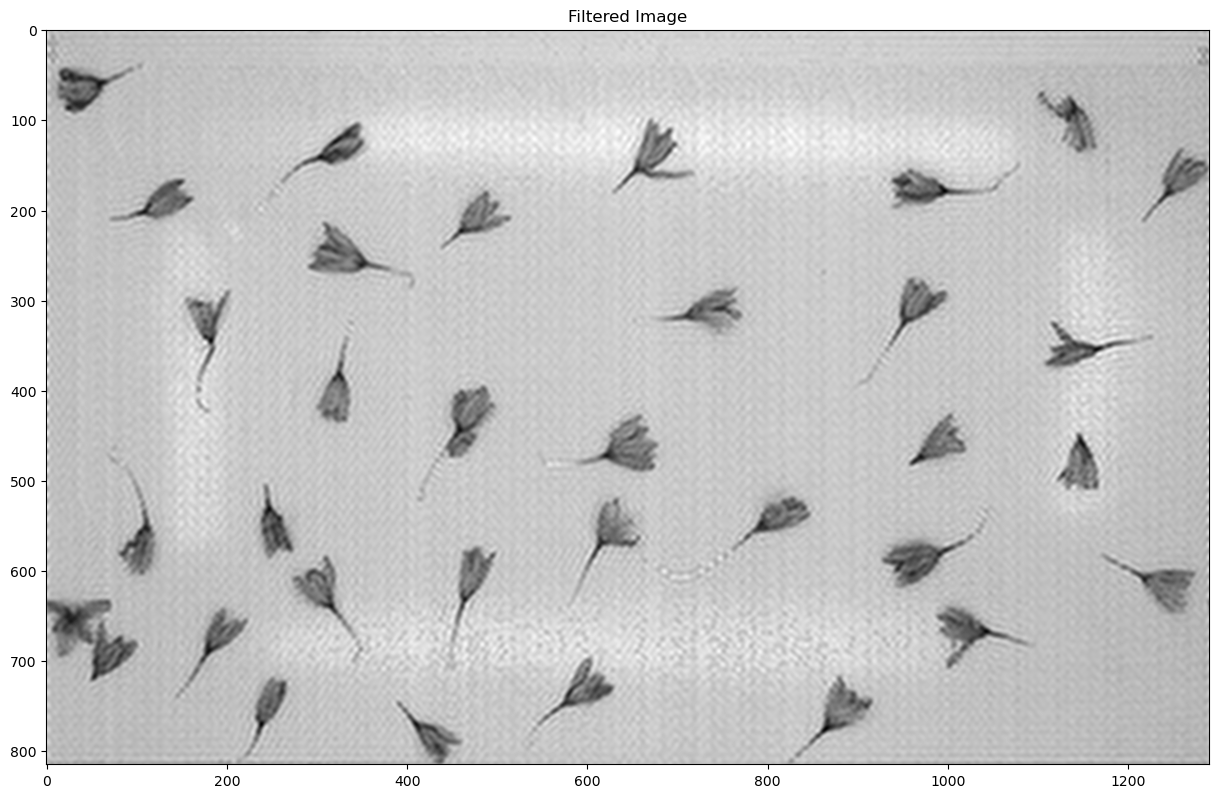

In [11]:
# filtered2_img = np.fft.ifft2(np.fft.ifftshift(im_fft2))
filtered2_img = np.fft.ifft2(im_fft2)
# normalize
filtered2_img = np.abs(filtered2_img)
# histogram stretching with cv2
# filtered2_img = cv2.normalize(filtered_img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
plt.figure(figsize=(15,15))
plt.imshow(filtered2_img, cmap='gray')
plt.title('Filtered Image')
plt.show()

<div dir="rtl">
    فیلتر با روش سوم
منبع :
chatgpt
<div>

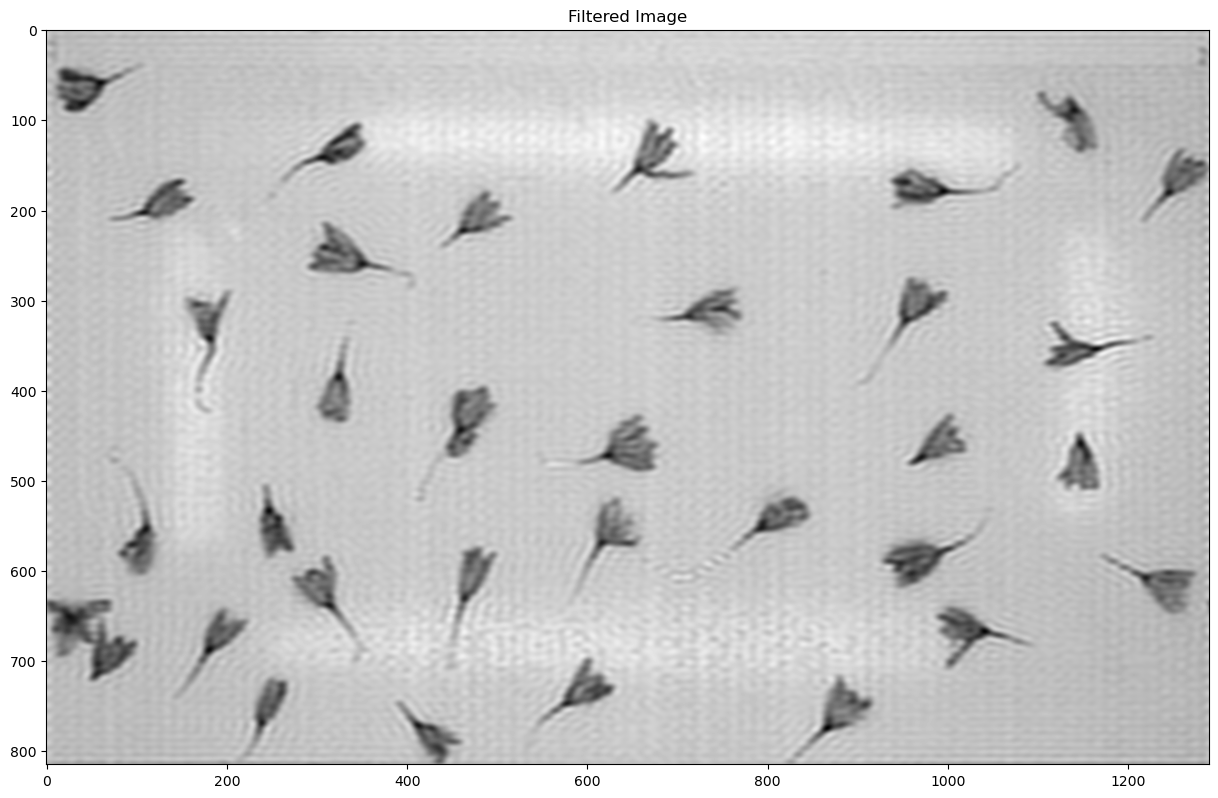

In [12]:
# Define a low-pass filter
M, N = original_img.shape
h_lp = np.zeros((M, N))
D = 100  # Cutoff frequency
for u in range(M):
    for v in range(N):
        d = np.sqrt((u-M//2)**2 + (v-N//2)**2)
        if d <= D:
            h_lp[u,v] = 1

# Filter the spectrum with the low-pass filter
F_filtered = fshift * h_lp
# filtered3_img = np.real(np.fft.ifft2(filtered_fft))
filtered3_img = np.real(np.fft.ifft2(np.fft.ifftshift(F_filtered)))

# Show the result
plt.figure(figsize=(15,15))
plt.imshow(filtered3_img, cmap='gray')
plt.title('Filtered Image')
plt.show()


ب)

<div dir="rtl">
    پیدا کردن لبه ها با canny
<div>

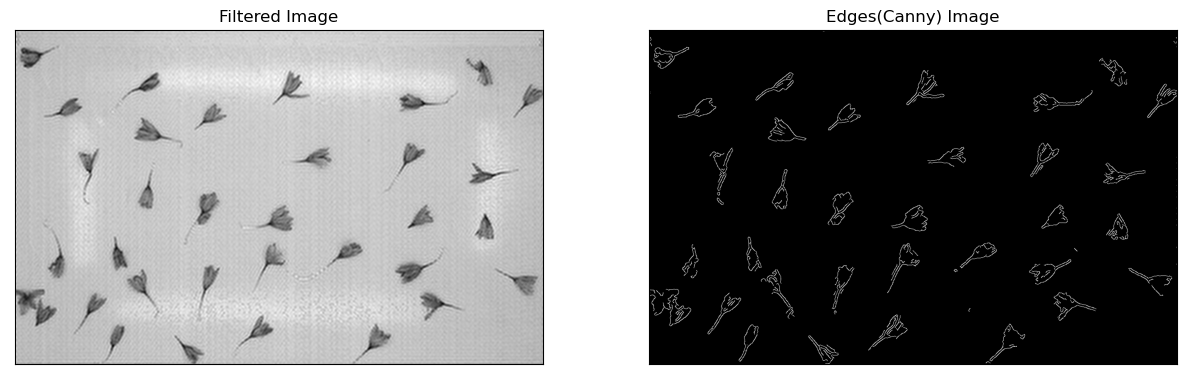

In [31]:
# perform canny on filtered image with opencv
# https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html

# normalized_filtered_img = np.abs(filtered_img) # worse
normalized_filtered_img = np.abs(filtered2_img) # best
# normalized_filtered_img = np.abs(filtered3_img) # better
normalized_filtered_img = cv2.normalize(normalized_filtered_img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
# edges = cv2.Canny(normalized_filtered_img, 100, 200)
edges = cv2.Canny(normalized_filtered_img, 80, 170) # better result
# edges = cv2.Canny(normalized_filtered_img, 80, 170, 3, L2gradient=True)
# edges = cv2.Canny(original_img, 100, 200)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(normalized_filtered_img,cmap = 'gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edges(Canny) Image'), plt.xticks([]), plt.yticks([])

plt.show()


<div dir="rtl">
    برای لبه‌یابی از تابع Canny استفاده می‌کنیم. این تابع دارای سه پارامتر است: کرنل سایز، حداقل و حداکثر مقدار threshold. کرنل سایز برای فیلتر کردن تصویر استفاده می‌شود و حداقل و حداکثر threshold برای تشخیص لبه‌ها به کار می‌روند. پارامتر threshold را با تغییر دادن مقادیر آن، بهینه‌سازی کرده‌ایم.
<div>

ج)

<div dir="rtl">
    از تصویر بدست آمده گرادیان بگیرید و با استفاده از تابع  arctan2جهت گرادیان های بدست آمده را محاسبه
کنید
<div>

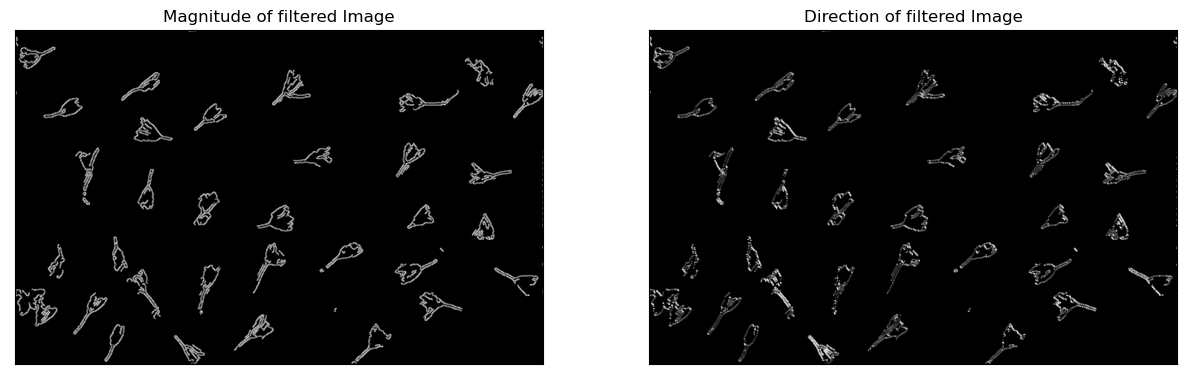

In [32]:
# get gradiant from filtered image and show directions with arctan2

# src : https://evergreenllc2020.medium.com/fundamentals-of-image-gradients-and-edge-detection-b093662ade1b

# compute the gradient magnitude and orientation respectively
# compute gradients along the X and Y axis, respectively
# getting_gradient_img = np.abs(filtered_img)
getting_gradient_img = edges
gX = cv2.Sobel(getting_gradient_img, ddepth=cv2.CV_64F, dx=1, dy=0) # https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
gY = cv2.Sobel(getting_gradient_img, ddepth=cv2.CV_64F, dx=0, dy=1) # https://pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/
magnitude_of_filtered_img = np.sqrt((gX ** 2) + (gY ** 2))
direction_of_filtered_img = np.arctan2(gY, gX) * (180 / np.pi) % 180

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(magnitude_of_filtered_img,cmap = 'gray')
plt.title('Magnitude of filtered Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(direction_of_filtered_img,cmap = 'gray') # (measured in degrees)
plt.title('Direction of filtered Image'), plt.xticks([]), plt.yticks([])

plt.show()

# # show the orientation of the gradient in the image
# cv2.imshow("gradient orientation", orientation_of_filtered_img)
# # show the gradient magnitude in the image
# cv2.imshow("gradient magnitude", magnitude_of_filtered_img)
# # waits for user to press any key
# # (this is necessary to avoid Python kernel form crashing)
# cv2.waitKey(0)
# # closing all open windows
# cv2.destroyAllWindows()


<div dir="rtl">
    برای بدست آوردن نقطه برش ساقه از گلبرگ، میتوان با استفاده از جهت گرادیانهای بدست آمده، خطوطی را که متناظر با ادامه ساقه است، تشخیص داد. سپس با استفاده از این خطوط، نقطهای که برش ساقه را نشان میدهد را تعیین کرد. این روش با استفاده از الگوریتم های تشخیص خط و روشهای تخمین خط مانند رگرسیون خطی، قابل انجام است. همچنین با مقایسه‌ی گرادیان‌های گلبرگ و گرادیان‌های ساقه و تغییر جهتی هم که دارند می‌توان یک روش و الگوریتمی برای پیدا کردن نقطه برش ساقه از گلبرگ پیدا کرد.
    با استفاده از جهت گرادیان های بدست آمده، می توانیم نقطه برش ساقه از گلبرگ را بیابیم. برای این کار، می توانیم از روش زیر استفاده کنیم:
1. با استفاده از تابع cv2.Sobel، گرادیان های x و y را بدست آورده و سپس ماژول گرادیان را با استفاده از تابع cv2.magnitude محاسبه می کنیم.
2. سپس جهت گرادیان ها را با استفاده از تابع cv2.phase و arctan2 به دست می آوریم.
3. در نهایت، با استفاده از جهت گرادیان های بدست آمده، محاسبات لازم را برای پیدا کردن نقطه برش ساقه انجام داد.
برای پیدا کردن نقطه برش ساقه، می توان به صورت زیر عمل کرد:
1. با استفاده از تابع cv2.inRange، پس زمینه عکس را حذف کنید.
2. سپس با استفاده از تابع cv2.findContours، لبه های تصویر را پیدا کنید.
3. سپس با استفاده از تابع cv2.fitLine، خطی را برای لبه های پیدا شده بدست آورید.
4. با استفاده از خط بدست آمده، نقطه برش ساقه را محاسبه کنید.
توجه: این روش فقط در صورتی کارآمد است که ساقه گلبرگ به صورت عمودی و یکنواخت باشد. در غیر این صورت، نتایج به دقت کافی نخواهند داشت.

<div>